In [1]:
from astropy.io import fits,ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
p=fits.open('Praesepe.fits')
pt = Table(p[1].data)

Check the GAIA's parallaxes if one can identify the cluster directly

The peak at ~5.4 is the distance of M44


Text(0.5,0,'parallax')

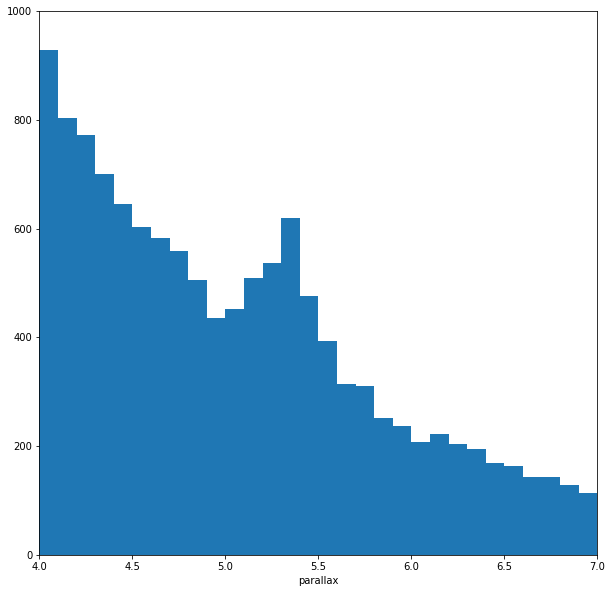

In [3]:
plt.figure(figsize=(10,10))
plt.hist(pt['gaia_dr2_source.parallax'],range=(0,20),bins=200)
#plt.yscale('log')
plt.xlim(4,7)
plt.ylim(0,1000)
plt.xlabel('parallax')

In [4]:
#pt[(pt['HDBscan_Cluster'] == 1) & (pt['HDBscan_MemProb'] >= 0.1)]
ini_member = pt[(pt['gaia_dr2_source.parallax'] >= 4.5) & (pt['gaia_dr2_source.parallax'] <= 6.0)]

In [5]:
#for c in set(pt['HDBscan_Cluster']):
#    print(c,pt["HDBscan_Stability"][pt["HDBscan_Cluster"]==c][0])

In [6]:
#plt.figure(figsize=(10,10))
#small = pt[(pt['gaia_dr2_source.parallax'] >= 4.5) & (pt['gaia_dr2_source.parallax'] <= 6.0)]
#big = pt[(pt['gaia_dr2_source.parallax'] >= 7.5) & (pt['gaia_dr2_source.parallax'] <= 8)]
#plt.plot(big['gaia_dr2_source.ra'],big['gaia_dr2_source.dec'],'.',alpha=0.5,label='big')
#plt.plot(small['gaia_dr2_source.ra'],small['gaia_dr2_source.dec'],'.',markersize=1,label='small')
#plt.legend()

convert RA DEC into XYZ

In [7]:
ini_member_pos = SkyCoord(ra=ini_member['gaia_dr2_source.ra'],
                          dec=ini_member['gaia_dr2_source.dec'],unit=(u.deg,u.deg),frame='icrs',
                         distance=(1.e3/ini_member['gaia_dr2_source.parallax'])*u.pc,
                         pm_ra_cosdec=ini_member['gaia_dr2_source.pmra']* u.mas/u.yr,
                         pm_dec=ini_member['gaia_dr2_source.pmdec']* u.mas/u.yr)
ini_xyz = ini_member_pos.cartesian.xyz.transpose()

Simple DBSCAN... 

significant groups will be printed 

In [8]:
n_eps = 1
min_sample = 5
factor = 3
ini_db = DBSCAN(eps=n_eps,min_samples=min_sample,algorithm='brute',leaf_size=60).fit(ini_xyz)
group_idx = []
group_ID = []
for x in set(ini_db.labels_):
    if x >= 0:
        mask= ini_db.labels_ == x
        number = len(np.where(mask == True)[0])
        if number >= factor * min_sample:
            print(x,number)
            group_idx.append(np.where(mask == True)[0])
            group_ID.append(x)

1 175
2 15
12 26


(18, 22)

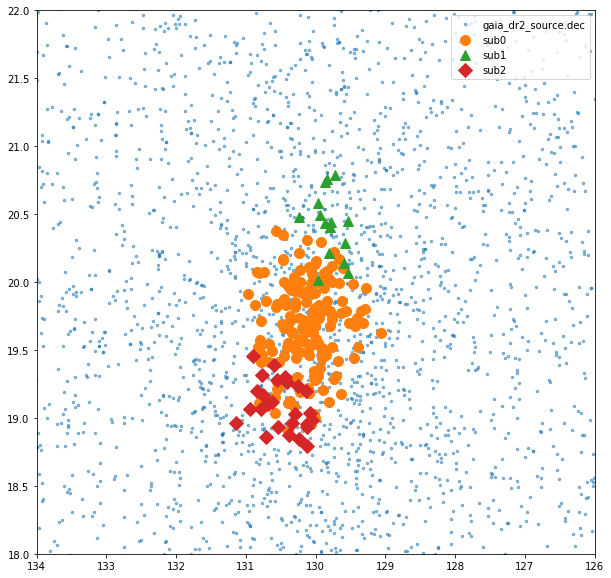

In [9]:
plt.figure(figsize=(10,10))
plt.plot(ini_member['gaia_dr2_source.ra'],ini_member['gaia_dr2_source.dec'],'.',markersize=5,alpha=0.5)
id=0
sym=['o','^','D','p','s','+','x']
for x in group_idx:
    plt.plot(ini_member['gaia_dr2_source.ra'][x],ini_member['gaia_dr2_source.dec'][x],sym[id],markersize=10,label='sub'+str(int(id)))
    #plt.plot(ini_member['gaia_dr2_source.ra'][group_idx[1]],ini_member['gaia_dr2_source.dec'][x],'^',markersize=10,label='sub'+str(int(id)))
    #plt.plot(ini_member['gaia_dr2_source.ra'][group_idx[2]],ini_member['gaia_dr2_source.dec'][x],'D',markersize=10,label='sub'+str(int(id)))
    #plt.plot(ini_member['gaia_dr2_source.ra'][group_idx[3]],ini_member['gaia_dr2_source.dec'][x],'p',markersize=10,label='sub'+str(int(id)))
    #plt.plot(ini_member['gaia_dr2_source.ra'][group_idx[4]],ini_member['gaia_dr2_source.dec'][group_idx[4]],'s',markersize=10,label='sub'+str(int(id)))
    id=id+1

plt.legend()
plt.xlim(134,126)
plt.ylim(18,22)

(-17, -10)

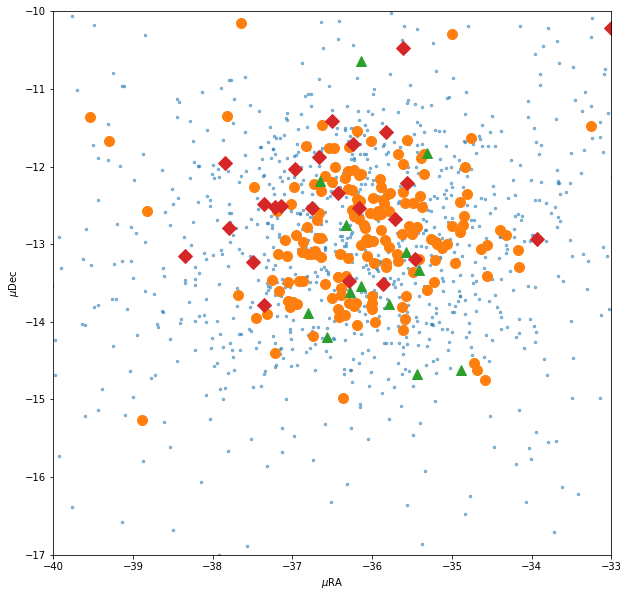

In [10]:
plt.figure(figsize=(10,10))
plt.plot(ini_member['gaia_dr2_source.pmra'],ini_member['gaia_dr2_source.pmdec'],'.',markersize=5,alpha=0.5)
id=0
for x in group_idx:
    plt.plot(ini_member['gaia_dr2_source.pmra'][x],ini_member['gaia_dr2_source.pmdec'][x],sym[id],markersize=10,label='sub'+str(id))
    id=id+1
#plt.plot(ini_member['gaia_dr2_source.pmra'][x],ini_member['gaia_dr2_source.pmdec'][x],'^',markersize=10,label='subA')
#plt.plot(ini_member['gaia_dr2_source.pmra'][x],ini_member['gaia_dr2_source.pmdec'][x],'D',markersize=10,label='subA')
#plt.plot(ini_member['gaia_dr2_source.pmra'][x],ini_member['gaia_dr2_source.pmdec'][x],'p',markersize=10,label='subA')
#plt.plot(ini_member['gaia_dr2_source.pmra'][x],ini_member['gaia_dr2_source.pmdec'][x],'s',markersize=10,label='subA')
plt.xlabel('$\mu$RA')
plt.ylabel('$\mu$Dec')
plt.xlim(-40,-33)
plt.ylim(-17,-10)

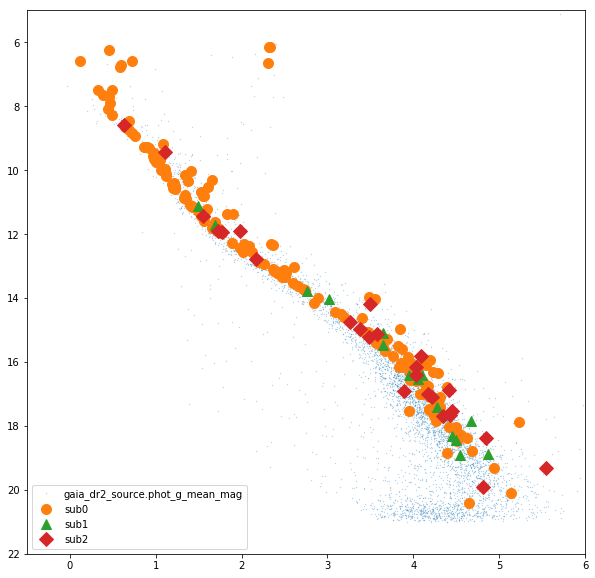

In [11]:
plt.figure(figsize=(10,10))
plt.plot(ini_member['gaia_dr2_source.phot_g_mean_mag'] - ini_member['WISE_W2'], ini_member['gaia_dr2_source.phot_g_mean_mag'],'.',markersize=0.5,alpha=0.5)
id=0
for x in group_idx:
    plt.plot(ini_member['gaia_dr2_source.phot_g_mean_mag'][x] - ini_member['WISE_W2'][x], ini_member['gaia_dr2_source.phot_g_mean_mag'][x],sym[id],markersize=10,label='sub'+str(id))
    id=id+1

#plt.plot(ini_member['gaia_dr2_source.phot_g_mean_mag'][group_idx[1]] - ini_member['WISE_W2'][group_idx[1]], ini_member['gaia_dr2_source.phot_g_mean_mag'][group_idx[1]],'^',markersize=10,label='subA')
#plt.plot(ini_member['gaia_dr2_source.phot_g_mean_mag'][group_idx[2]] - ini_member['WISE_W2'][group_idx[2]], ini_member['gaia_dr2_source.phot_g_mean_mag'][group_idx[2]],'D',markersize=10,label='subB')
#plt.plot(ini_member['gaia_dr2_source.phot_g_mean_mag'][group_idx[3]] - ini_member['WISE_W2'][group_idx[3]], ini_member['gaia_dr2_source.phot_g_mean_mag'][group_idx[3]],'p',markersize=10,label='subC')
#plt.plot(ini_member['gaia_dr2_source.phot_g_mean_mag'][group_idx[4]] - ini_member['WISE_W2'][group_idx[4]], ini_member['gaia_dr2_source.phot_g_mean_mag'][group_idx[4]],'s',markersize=10,label='subD')
plt.ylim(22,5)
plt.xlim(-0.5,6)
plt.legend()

Text(0,0.5,'b')

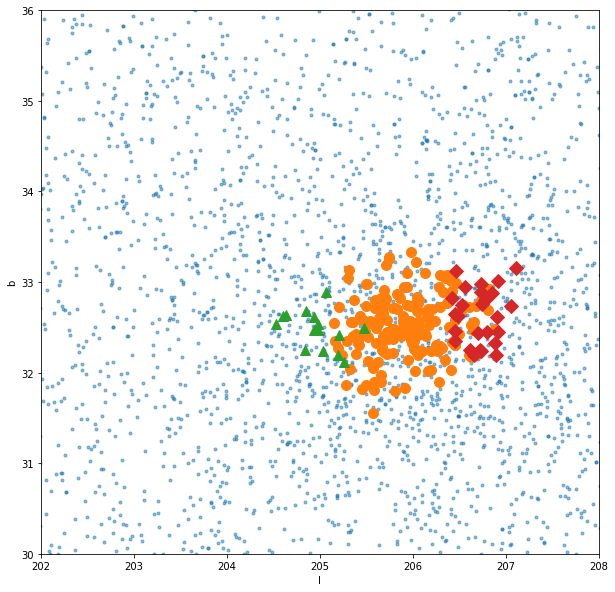

In [12]:
plt.figure(figsize=(10,10))
plt.plot(ini_member_pos.galactic.l,ini_member_pos.galactic.b,'.',alpha=0.5)
id=0
for x in group_idx:
    plt.plot(ini_member_pos.galactic.l[x],ini_member_pos.galactic.b[x],sym[id],markersize=10,label='sub'+str(int(id)))
    id=id+1
plt.xlim(202,208)
plt.ylim(30,36)
plt.xlabel('l')
plt.ylabel('b')

Text(0,0.5,'pm_b')

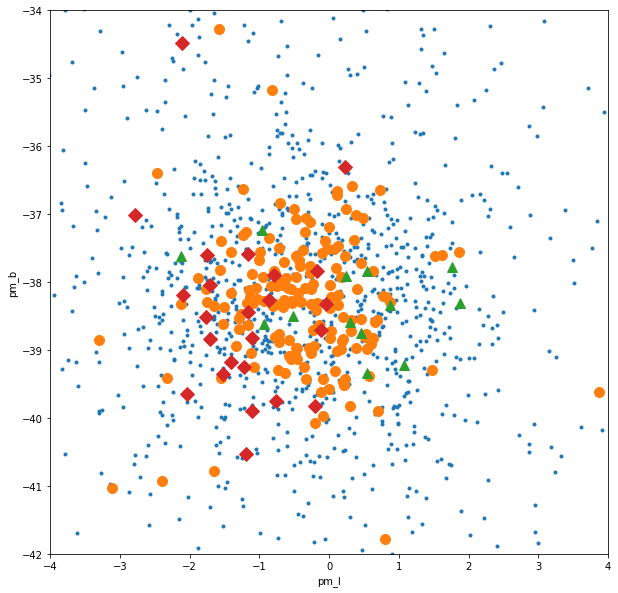

In [13]:
plt.figure(figsize=(10,10))
plt.plot(ini_member_pos.galactic.pm_l_cosb,ini_member_pos.galactic.pm_b,'.')
id=0
for x in group_idx:
    plt.plot(ini_member_pos.galactic.pm_l_cosb[x],ini_member_pos.galactic.pm_b[x],sym[id],markersize=10,label='sub'+str(int(id)))
    id=id+1

plt.xlim(-4,4)
plt.ylim(-42,-34)
plt.xlabel('pm_l')
plt.ylabel('pm_b')